In [1]:
'''
Import python packages
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
Set plot style
'''
sns.set(style="whitegrid")
colors = sns.color_palette("Set1")

In [3]:
'''
Load data
'''
datafile = pd.read_csv('../../data/TEP0_1_time.csv')

# Check if 'INDEX' column exists and drop it if it does
if 'INDEX' in datafile.columns:
    datafile = datafile.drop('INDEX', axis=1)

print(datafile.head())

        VA1          VA2          VA3       VA4        VA5        VA6   
0  0.271033  3649.739415  4451.320791  9.223142  32.392900  47.559754  \
1  0.270831  3653.404787  4488.749834  9.212395  32.503406  47.388454   
2  0.270483  3688.231984  4433.015687  9.236162  32.408470  47.836241   
3  0.272138  3651.819407  4459.462199  9.192421  31.889585  47.893882   
4  0.271177  3636.475344  4460.599294  9.275409  32.448601  47.540016   

           VA7        VA8         VA9      VA10  ...       VA41       VA42   
0  2798.975799  64.995825  122.898796  0.197826  ...  43.985723  62.806984  \
1  2799.619582  65.097593  122.883494  0.195043  ...  43.985723  62.820435   
2  2800.848255  64.827252  122.920804  0.197604  ...  43.985723  62.838892   
3  2800.819372  64.228681  122.896413  0.204403  ...  44.494201  62.850592   
4  2800.969862  64.631039  122.894050  0.206725  ...  44.494201  62.850856   

        VA43       VA44       VA45       VA46       VA47       VA48   
0  53.286709  26.6621

In [4]:
'''
Preprocess data
'''
datafile.fillna(datafile.mean(), inplace=True)

# Define target and predictor variables
targetlist = ["VA1"]
predictorlist = ["VA2", "VA3", "VA4", "VA5"]

# Separate predictors (X) and target (y)
X = datafile[predictorlist].values
y = datafile[targetlist].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
'''
Analyze regression model accuracies from a list of options
(Ranking by MSE)
'''
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR()
]

# Initialize dictionaries to store results
accuracy_metrics = {}
mse_results = {}
r_squared_results = {}

# Train and evaluate each model
for model in regression_models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    mse_results[model_name] = mse
    r_squared = model.score(X_test_scaled, y_test)
    r_squared_results[model_name] = r_squared
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    mpe = np.mean((y_test - predictions) / y_test) * 100
    
    # Store accuracy metrics for each model
    accuracy_metrics[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R-squared': r_squared,
        'MAPE': mape,
        'MPE': mpe
    }

# Rank models by MSE and R-squared
sorted_models_mse = sorted(mse_results.items(), key=lambda x: x[1])
top_models_mse = [model_name for model_name, _ in sorted_models_mse[:5]]
sorted_models_r_squared = sorted(r_squared_results.items(), key=lambda x: x[1], reverse=True)
top_models_r_squared = [model_name for model_name, _ in sorted_models_r_squared[:3]]

# Format and print evaluation metrics for the top models
m_outputs = []
for model_name in top_models_mse:
    metrics = accuracy_metrics[model_name]
    metrics_output = (
        f"Model: {model_name}\n"
        f"R-squared: {metrics['R-squared']:.5f}\n"
        f"MSE: {metrics['MSE']:.5f}\n"
        f"MAE: {metrics['MAE']:.5f}\n"
        f"RMSE: {metrics['RMSE']:.5f}\n"
        f"MAPE: {metrics['MAPE']:.5f}%\n"
        f"MPE: {metrics['MPE']:.5f}%\n"
        + "=" * 60 + "\n"
    )
    m_outputs.append(metrics_output)

for output in m_outputs[:5]:
    print(output)

Model: RandomForestRegressor
R-squared: 0.99220
MSE: 0.00057
MAE: 0.01504
RMSE: 0.02381
MAPE: 2.72308%
MPE: -0.33312%

Model: GradientBoostingRegressor
R-squared: 0.98999
MSE: 0.00073
MAE: 0.01683
RMSE: 0.02698
MAPE: 2.96641%
MPE: -0.27733%

Model: AdaBoostRegressor
R-squared: 0.98859
MSE: 0.00083
MAE: 0.01988
RMSE: 0.02879
MAPE: 3.30836%
MPE: -0.17541%

Model: DecisionTreeRegressor
R-squared: 0.98667
MSE: 0.00097
MAE: 0.01887
RMSE: 0.03113
MAPE: 3.63582%
MPE: -0.22707%

Model: Ridge
R-squared: 0.96716
MSE: 0.00239
MAE: 0.03848
RMSE: 0.04886
MAPE: 9.24780%
MPE: -1.12081%



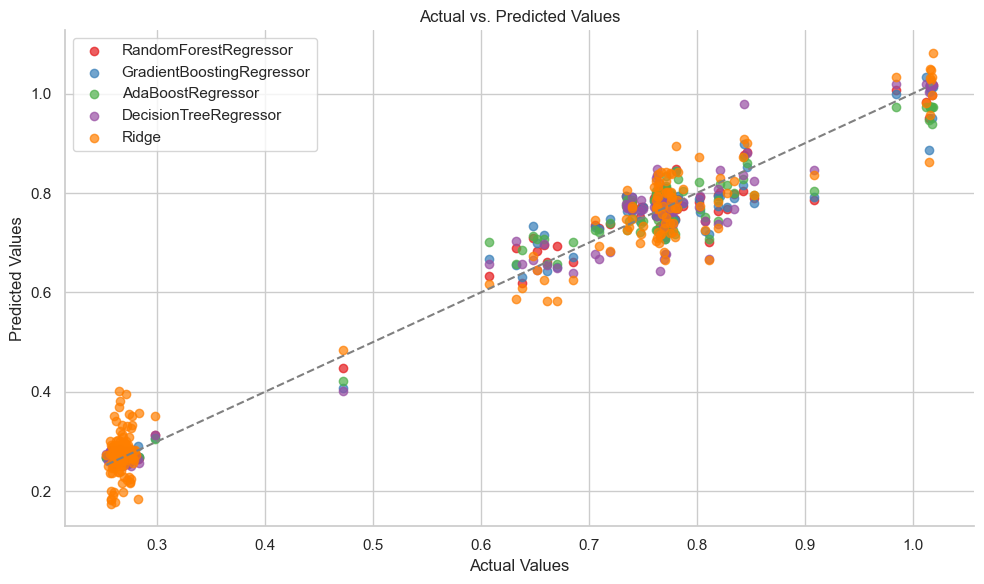

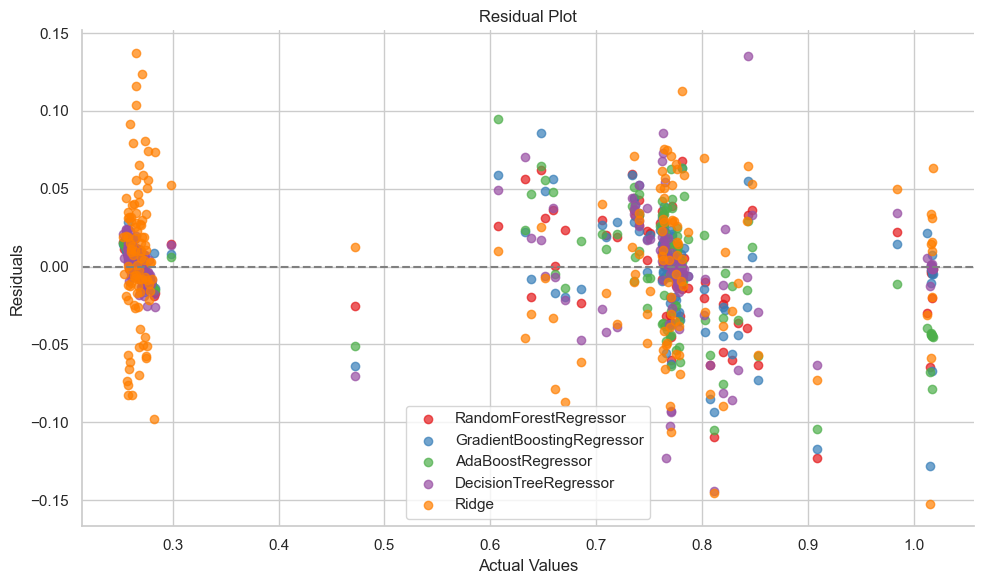

In [6]:
'''
Visualize top 5 regression models
'''
# Scatter Plot for Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
for i, model_name in enumerate(top_models_mse):
    model = [m for m in regression_models if m.__class__.__name__ == model_name][0]
    predictions = model.predict(X_test_scaled)
    plt.scatter(y_test, predictions, label=model_name, color=colors[i], alpha=0.7)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

# Residual Plot for the top models
plt.figure(figsize=(10, 6))
for i, model_name in enumerate(top_models_mse):
    model = [m for m in regression_models if m.__class__.__name__ == model_name][0]
    predictions = model.predict(X_test_scaled)
    residuals = predictions - y_test
    plt.scatter(y_test, residuals, label=model_name, color=colors[i], alpha=0.7)

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()